<a href="https://colab.research.google.com/github/Davidarr96/Pryecto_MLOps/blob/main/EDA_PI_MLOPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis exploratorio de los datos: (Exploratory Data Analysis-EDA)**
Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente 👀 ), y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior.

Sabes que puedes apoyarte en librerías como pandas profiling, sweetviz, autoviz, entre otros y sacar de allí tus conclusiones 😉

In [1]:
# Vinculamos google colab con google drive para importar el dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importamos librerias

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Levantamos los datasets a analizar, y guardamos en una variable

data_score = pd.read_csv('/content/drive/MyDrive/plataforma/datasets/score.csv', sep=',', encoding='latin-1')
data_movies = pd.read_csv('/content/drive/MyDrive/plataforma/datasets/plataformas_prom.csv', sep=',', encoding='latin-1')
     

In [4]:
# Visualizamos las columnas del dataset y sus primeros registros

data_score.head()

,userId,rating,timestamp,movieId
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186
2,1,5.0,2015-03-09,hs2381
3,1,5.0,2015-03-09,ns3663
4,1,5.0,2015-03-09,as9500


In [5]:
# Cantidad de filas y columnas del dataset

print("Cant registros:", data_score.shape[0])
print("Cant columnas:", data_score.shape[1])

Cant registros: 11013823
Cant columnas: 4


In [6]:
# Verificamos que no existan valores nulos o faltantes.

data_score.isna().sum()

userId       0
rating       0
timestamp    0
movieId      0
dtype: int64

In [8]:
# En caso que existan, eliminamos registros repetidos

data_score.drop_duplicates(inplace=True)
print("Cant registros:", data_score.shape[0])

Cant registros: 11013823


In [9]:
# Observamos tipos de datos que tiene el dataset, y que espacio ocupa en memoria

data_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11013823 entries, 0 to 11013822
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   rating     float64
 2   timestamp  object 
 3   movieId    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 420.1+ MB


In [10]:
# Correlación entre variables del dataset

data_score.corr()
     

<ipython-input-10-a9f896e977f0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_score.corr()


,userId,rating
userId,1.000000,0.004616
rating,0.004616,1.000000


In [11]:
# Nos quedamos con las columnas que vamos a usar

data_score_final = data_score[ ['userId', 'rating', 'movieId'] ]
data_score_final

,userId,rating,movieId
0,1,1.0,as680
1,1,4.5,ns2186
2,1,5.0,hs2381
3,1,5.0,ns3663
4,1,5.0,as9500
...,...,...,...
11013818,124380,4.5,ns5272
11013819,124380,2.5,ns5492
11013820,124380,3.5,hs305
11013821,124380,4.5,ns7881


In [12]:
# Hacemos lo mismo con el dataset de peliculas

data_movies_final = data_movies[ ['Id', 'title'] ]
data_movies_final

,Id,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception
3,as4,pink: staying true
4,as5,monster maker
...,...,...
22993,ns8803,zodiac
22994,ns8804,zombie dumb
22995,ns8805,zombieland
22996,ns8806,zoom


# ***Preguntas***

In [13]:
# Cuántos usuarios votaron?

data_score_final['userId'].nunique()

115077

In [14]:
# Cual es el valor promedio de votacion?

prom = data_score_final['rating'].mean().round(2)
print("Valor promedio:", prom)
     

Valor promedio: 3.53


In [15]:
# Cual es el valor minimo y maximo de votacion?

min = data_score_final['rating'].min()
print("Valor minimo:", min)


max = data_score_final['rating'].max()
print("Valor maximo:", max)

Valor minimo: 0.5
Valor maximo: 5.0


In [16]:
# Calificaciones de películas por usuario

data_score_byusers = data_score_final.groupby(['userId']).count()
data_score_byusers.head()

,rating,movieId
userId,,
1,27,27
2,22,22
3,10,10
4,62,62
5,26,26


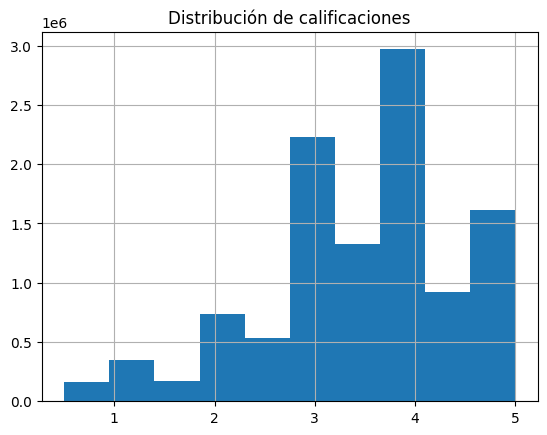

In [17]:
# Observamos la distribución de las calificaciones

data_score_final['rating'].hist()
plt.title('Distribución de calificaciones')
plt.show()

In [18]:
# Pelicula con más y menos calificaciones

data_score_bymovies = data_score_final.groupby(['movieId']).count()
data_score_bymovies

,userId,rating
movieId,,
as1,502,502
as10,512,512
as100,429,429
as1000,483,483
as1001,469,469
...,...,...
ns995,446,446
ns996,492,492
ns997,474,474


In [19]:
idx_max = data_score_bymovies['userId'].idxmax()
print("Mas votada:", data_movies_final['title'][data_movies_final['Id']==idx_max] )

Mas votada: 4196    from other worlds
Name: title, dtype: object


In [20]:
idx_min = data_score_bymovies['userId'].idxmin()
print("Menos votada:", data_movies_final['title'][data_movies_final['Id']==idx_min] )

Menos votada: 4939    mitzi (nbc 1968)
Name: title, dtype: object


In [21]:
# Peliculas por popularidad

data_score_bymovies = data_score.groupby(['movieId']).count()
data_score_bymovies.sort_values('userId', ascending = False, inplace = True)
data_score_bymovies['vistos'] = data_score_bymovies['userId']
data_score_bymovies.drop(columns = ['userId','rating', 'timestamp'], inplace = True)
data_score_bymovies.head(10)

,vistos
movieId,
as4197,575
as9065,560
ns7279,558
as848,557
hs2360,556
as6998,555
as4889,554
as9469,554
hs582,554


In [22]:
# Agregamos la columna titulo para saber el nombre de las peliculas

data_score_bymovies = pd.merge(left=data_score_bymovies, right=data_movies_final, how='left', left_on='movieId', right_on='Id')
data_score_bymovies

,vistos,Id,title
0,575,as4197,from other worlds
1,560,as9065,the organization
2,558,ns7279,"leapfrog: sing-along, read-along"
3,557,as848,superbook
4,556,hs2360,dietland
...,...,...,...
22993,404,ds782,cars toon: hiccups
22994,402,ns6535,cop and a half: new recruit
22995,401,hs1711,i am alone
22996,399,ns2144,"rob schneider: asian momma, mexican kids"
